# Visualizing Images in Python

---
## Learning Objectives
By the end of this module, participants will be able to:
- Understand how images are represented and visualized using matplotlib.imshow.
- Use napari for interactive image and mask visualization.
- Overlay segmentation masks and adjust contrast to enhance visual clarity.
- Apply these tools to interpret bioimage analysis results.

---
## Introduction to `matplotlib.imshow`
`matplotlib.pyplot.imshow` is a basic yet powerful way to visualize images in Python. It converts NumPy arrays (which often represent image data) into 2D or 3D visual outputs.
- Image data is typically stored as a 2D array (grayscale) or 3D array (RGB or multi-channel).
- imshow maps pixel values to colors using colormaps.
- It allows for scaling, interpolation, and applying different colormaps to enhance contrast or highlight features.

**Key Parameters:**
- `cmap`: Set to 'gray' for grayscale, 'viridis', 'magma', etc., for color maps.
- `vmin`, `vmax`: Used to control contrast by setting the min/max pixel values.
- `interpolation`: Controls how pixel values are interpolated ('none', 'nearest', etc.).

### Hands-on Coding

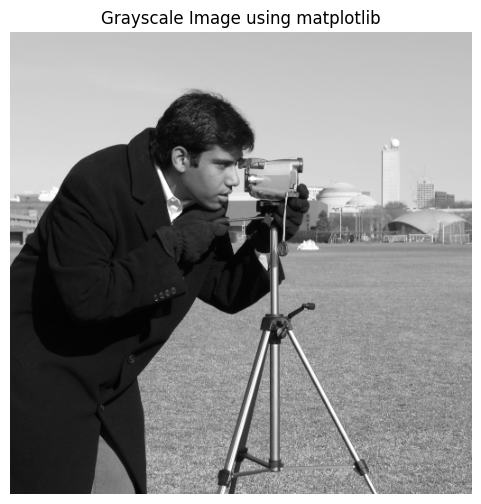

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Load sample image
image = data.camera()  # grayscale image

plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Grayscale Image using matplotlib")
plt.axis('off')
plt.show()

*Try changing cmap to 'magma' or adjusting `vmin` and `vmax`.*

### Exercise
- Load the coins image from skimage.data.
- Display it using:
    - A grayscale colormap.
    - A false color map ('plasma').
    - Custom contrast settings (vmin, vmax).

*Discuss: Which visualization helps you best separate foreground from background?*

---
## Introduction to napari
napari is a fast, interactive, multi-dimensional image viewer for Python. It supports:
- 2D, 3D, and time-series images.
- Viewing raw images and masks simultaneously.
- Interactive contrast adjustment, zooming, and layer management.
- It is particularly useful for microscopy images and segmentation tasks.

In [2]:
import napari
from skimage import data

image = data.cells3d()[:, 1, :, :]  # 3D stack, one channel

viewer = napari.view_image(image, name='Cell nuclei', colormap='gray')
napari.run()

ModuleNotFoundError: No module named 'napari'

*Note: Run this in a Jupyter Notebook or Python script, not inside IPython terminals like Colab.*

### Exercise
- Load the `astronaut` image from `skimage.data`.
- Convert it to grayscale and visualize in `napari`.
- Experiment with zoom, contrast sliders, and layer visibility.

---
## Overlaying Masks & Adjusting Contrast
In bioimage analysis, visualizing segmentation results involves overlaying label/mask images on top of raw images.
- Masks are typically integer arrays where each value corresponds to a segmented region.
- Overlays help verify segmentation accuracy.
- Adjusting contrast enhances interpretability, especially for low-intensity features.

**Overlay Options:**
- In `matplotlib`: use `imshow` twice with `alpha` blending.
- In `napari`: add image and mask as separate layers.

In [ ]:
from skimage import data, filters, measure

image = data.coins()
threshold = filters.threshold_otsu(image)
mask = image > threshold

plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.imshow(mask, cmap='Reds', alpha=0.5)
plt.title("Overlayed Mask on Original Image")
plt.axis('off')
plt.show()

### Exercise
- Load the camera image.
- Create a binary mask by thresholding the image at its mean intensity.
- Overlay this mask on the original image using matplotlib.

*Bonus: Visualize the same in napari using add_image and add_labels.*

---
## Mini Project: Visual Quality Control Dashboard for Segmentation
**Goal:** Build a simple visual inspection tool for verifying segmentation masks on microscopy images.

**Tasks:**
- Load a stack of 2D images (e.g., slices from a 3D image or time-lapse).
- For each slice:
    - Apply a simple segmentation (e.g., threshold).
    - Overlay the mask on the raw image.
    - Display using either:
        - `matplotlib` grid of images
        - or `napari` with time slider

Allow contrast adjustment for better visibility.

In [ ]:
from skimage import data, filters
import napari

# Load 3D image and threshold each slice
image_stack = data.cells3d()[:, 1, :, :]  # Use one channel
mask_stack = image_stack > filters.threshold_otsu(image_stack)

viewer = napari.view_image(image_stack, name='Nuclei', colormap='gray')
viewer.add_labels(mask_stack, name='Mask')
napari.run()

---
## Module Summary
| Topic               | Key Concept                                  | Tools Used             | Skills Gained                               |
| ------------------- | -------------------------------------------- | ---------------------- | ------------------------------------------- |
| `matplotlib.imshow` | Basic image display with contrast control    | `matplotlib`           | Plotting grayscale and colored images       |
| `napari`            | Interactive visualization for 2D/3D/masks    | `napari`               | Layered image and label display, navigation |
| Mask Overlay        | Combining images and masks with transparency | `matplotlib`, `napari` | Visual validation of segmentation output    |
| Mini Project        | QC dashboard for segmentation                | Combined               | Batch processing, image/mask visualization  |
